Import libraries and packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import datasets

In [4]:
import os
os.getcwd()

'c:\\Users\\aarev\\Documents\\airbnb'

In [5]:
df_contacts = pd.read_csv("data/contacts.csv", 
                          parse_dates=['ts_interaction_first', 'ts_reply_at_first', 
                                       'ts_accepted_at_first', 'ts_booking_at', 
                                       'ds_checkin_first', 'ds_checkout_first'],
                          date_parser=pd.Timestamp)
df_listings = pd.read_csv("data/listings.csv")
df_users = pd.read_csv("data/users.csv")

C:\Users\aarev\AppData\Local\Temp\ipykernel_19224\1869906130.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_contacts = pd.read_csv("data/contacts.csv",


In [6]:
# remove rows with booking with zero guests
df_contacts = df_contacts.loc[df_contacts.m_guests!=0]

In [7]:
display(df_contacts.head(3))

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaT,NaT,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new


In [8]:
display(df_listings.head(3))

,id_listing_anon,room_type,listing_neighborhood,total_reviews
0,71582793-e5f8-46d7-afdf-7a31d2341c79,Private room,-unknown-,0.0
1,a1a3f728-e21f-4432-96aa-361d28e2b319,Entire home/apt,Copacabana,0.0
2,353a68be-ecf9-4b7b-9533-c882dc2f0760,Entire home/apt,Barra da Tijuca,3.0


In [9]:
display(df_users.head(3))

,id_user_anon,country,words_in_user_profile
0,1d16a001-31a2-494c-a101-1f7b308adc62,FR,0
1,42607e0a-86c0-472e-b633-9e192114e93c,AR,0
2,25f85eb5-a700-44e1-b142-4c076222198d,BR,0


Join the 3 Dfs into one

In [10]:
# merge contacts and listings dfs
df_temp1 = pd.merge(df_contacts, df_listings, on='id_listing_anon')

In [11]:
# merge guest info into df 
df_temp2 = pd.merge(df_temp1, df_users, 
                    left_on='id_guest_anon', 
                    right_on='id_user_anon', 
                    how='left')

# rename columns with 'guest' prefix
df_temp2 = df_temp2.rename(columns={'country': 'guest_country', 
                                    'words_in_user_profile': 'guest_words_in_user_profile'})

# drop user id
df_temp2.drop('id_user_anon', 
              axis=1, 
              inplace=True)

In [12]:
# merge host info into df 
df_temp3 = pd.merge(df_temp2, df_users, 
                    left_on='id_host_anon', 
                    right_on='id_user_anon', 
                    how='left')

# rename columns with 'host' prefix
df_temp3 = df_temp3.rename(columns={'country': 'host_country', 
                                    'words_in_user_profile': 'host_words_in_user_profile'})

# drop user id
df_temp3.drop('id_user_anon', 
              axis=1, 
              inplace=True)

In [13]:
# Show 5-point stats
display(df_temp3.describe())

# Drop invalid review values

# rename final df
df_airbnb = df_temp3.copy()

,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,total_reviews,guest_words_in_user_profile,host_words_in_user_profile
count,28468,26379,16667,11738,28468,28468,28467.000000,28468.000000,28468.000000,28468.000000,28468.000000,28468.000000
mean,2016-03-23 01:29:44.049634560,2016-03-24 20:43:56.097956352,2016-03-30 13:03:26.720585472,2016-04-02 14:56:20.915914240,2016-05-31 13:20:46.873682688,2016-06-08 02:49:12.030349824,2.790354,8.226992,193.938457,15.536286,10.198363,54.912568
min,2016-01-01 00:46:47,2016-01-01 01:07:50,2016-01-01 12:24:15,2016-01-01 12:24:15,2016-01-01 00:00:00,2016-01-02 00:00:00,1.000000,1.000000,0.000000,-34.000000,0.000000,0.000000
25%,2016-01-27 20:35:55.249999872,2016-01-29 14:17:11.500000,2016-02-08 12:11:15,2016-02-14 00:03:32.750000128,2016-03-10 00:00:00,2016-03-17 00:00:00,2.000000,3.000000,66.000000,0.000000,0.000000,1.000000
50%,2016-03-18 15:36:42.500000,2016-03-21 15:16:36,2016-03-30 06:23:03,2016-04-03 15:11:32.500000,2016-06-11 00:00:00,2016-06-19 00:00:00,2.000000,5.000000,154.000000,3.000000,0.000000,21.000000
75%,2016-05-12 23:49:35.249999872,2016-05-14 22:29:16.500000,2016-05-19 04:37:48,2016-05-21 16:02:03.500000,2016-08-08 00:00:00,2016-08-16 00:00:00,4.000000,10.000000,269.000000,18.000000,1.000000,64.000000
max,2016-06-30 23:58:14,2017-02-23 08:56:59,2016-11-22 11:11:12,2016-09-21 21:55:48,2018-05-01 00:00:00,2018-05-04 00:00:00,16.000000,410.000000,2341.000000,268.000000,658.000000,1460.000000
std,NaN,NaN,NaN,NaN,NaN,NaN,1.880454,10.001379,183.521403,27.584648,30.814998,103.292835


In [14]:
df_airbnb.describe()

,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,total_reviews,guest_words_in_user_profile,host_words_in_user_profile
count,28468,26379,16667,11738,28468,28468,28467.000000,28468.000000,28468.000000,28468.000000,28468.000000,28468.000000
mean,2016-03-23 01:29:44.049634560,2016-03-24 20:43:56.097956352,2016-03-30 13:03:26.720585472,2016-04-02 14:56:20.915914240,2016-05-31 13:20:46.873682688,2016-06-08 02:49:12.030349824,2.790354,8.226992,193.938457,15.536286,10.198363,54.912568
min,2016-01-01 00:46:47,2016-01-01 01:07:50,2016-01-01 12:24:15,2016-01-01 12:24:15,2016-01-01 00:00:00,2016-01-02 00:00:00,1.000000,1.000000,0.000000,-34.000000,0.000000,0.000000
25%,2016-01-27 20:35:55.249999872,2016-01-29 14:17:11.500000,2016-02-08 12:11:15,2016-02-14 00:03:32.750000128,2016-03-10 00:00:00,2016-03-17 00:00:00,2.000000,3.000000,66.000000,0.000000,0.000000,1.000000
50%,2016-03-18 15:36:42.500000,2016-03-21 15:16:36,2016-03-30 06:23:03,2016-04-03 15:11:32.500000,2016-06-11 00:00:00,2016-06-19 00:00:00,2.000000,5.000000,154.000000,3.000000,0.000000,21.000000
75%,2016-05-12 23:49:35.249999872,2016-05-14 22:29:16.500000,2016-05-19 04:37:48,2016-05-21 16:02:03.500000,2016-08-08 00:00:00,2016-08-16 00:00:00,4.000000,10.000000,269.000000,18.000000,1.000000,64.000000
max,2016-06-30 23:58:14,2017-02-23 08:56:59,2016-11-22 11:11:12,2016-09-21 21:55:48,2018-05-01 00:00:00,2018-05-04 00:00:00,16.000000,410.000000,2341.000000,268.000000,658.000000,1460.000000
std,NaN,NaN,NaN,NaN,NaN,NaN,1.880454,10.001379,183.521403,27.584648,30.814998,103.292835


## Feature Engineering

Categorize succesful bookings

In [15]:
# categorize succesful bookings
#===============================

# define new column , with default value
df_airbnb['booked'] = False

# if booked timestamp not null, set 'booked' true
df_airbnb.loc[df_airbnb['ts_booking_at'].notnull(), 'booked'] = True


Calculate time to book

In [16]:
# calculate time to book (from 1st interaction)
#===============================================

# define column, with default value
df_airbnb['booking_time'] = np.nan

# calculate difference, (time of booking) - (time of 1st interaction)
df_airbnb['booking_time'] = (df_airbnb[df_airbnb.booked == True].ts_booking_at 
                             - df_airbnb[df_airbnb.booked == True].ts_interaction_first).astype('timedelta64[s]')

Calculate seasonal average booking rate per listing

In [17]:
# calculate seasonal averages per listing
#=========================================

# function to get season at time of booking
def get_season(timestamp):
    month = timestamp.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# apply function
df_airbnb['season'] = df_airbnb['ts_booking_at'].apply(get_season)

In [18]:
# define columns to hold seasonal averages
df_airbnb['Spring'] = np.nan
df_airbnb['Summer'] = np.nan
df_airbnb['Autumn'] = np.nan
df_airbnb['Winter'] = np.nan
df_airbnb['listing_bookings'] = 0.0

In [19]:
# get averages for season per listing 

# for each 'listing'...
for listing in df_airbnb.id_listing_anon.unique():
    
    # filter for listing
    df_listing = df_airbnb.loc[df_airbnb.id_listing_anon == listing]

    # calculate listing total bookings
    listing_bookings = df_listing.booked.sum()
    df_airbnb.loc[(df_airbnb.id_listing_anon == listing), 'listing_bookings'] = listing_bookings
    
    # get list of seasons for 'listing'
    seasons = df_listing.season.unique()

    # for each season...
    for season in seasons:
        
        # calculate mean value
        df_season = df_listing.loc[df_listing.season == season]
        mean = df_season.booked.mean()
        
        # assign that value to that 'listing' and 'season'
        df_airbnb.loc[(df_airbnb.id_listing_anon == listing), season] = mean

In [20]:
# adequately rename seasonal average columns
df_airbnb.rename(columns={'Spring': 'spring_av', 
                          'Summer': 'summer_av',
                          'Autumn': 'autumn_av', 
                          'Winter': 'winter_av'},
                          inplace=True)

Calculate overall average booking rate per host 

In [21]:
# define column for host average
df_airbnb['host_av'] = np.nan
df_airbnb['num_listings'] = np.nan
df_airbnb['host_bookings'] = 0.0

In [22]:
# for each 'listing'...
for host in df_airbnb.id_host_anon.unique():
    
    # filter df for host
    df_temp = df_airbnb.loc[df_airbnb.id_host_anon == host]

    # calculate booking rate, # of listings, and total bookings
    host_mean = df_temp.booked.mean()
    num_listings = df_temp.id_listing_anon.nunique()
    host_tot_bookings = df_temp.booked.sum()

    # assign values
    df_airbnb.loc[df_airbnb.id_host_anon == host, 'host_av'] = host_mean
    df_airbnb.loc[df_airbnb.id_host_anon == host, 'num_listings'] = num_listings
    df_airbnb.loc[df_airbnb.id_host_anon == host, 'host_bookings'] = host_tot_bookings

In [23]:
df_airbnb.head(3)

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,booking_time,season,spring_av,summer_av,autumn_av,winter_av,listing_bookings,host_av,num_listings,host_bookings
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-08-02,2016-08-06,4.0,...,0 days 00:19:07,Spring,1.0,NaN,NaN,0.000,1.0,0.333333,2.0,2.0
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,...,NaT,Winter,NaN,NaN,NaN,0.000,0.0,0.000000,1.0,0.0
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaT,NaT,2016-03-14,2016-03-23,1.0,...,NaT,Winter,1.0,NaN,NaN,0.375,4.0,0.444444,1.0,4.0


## EDA

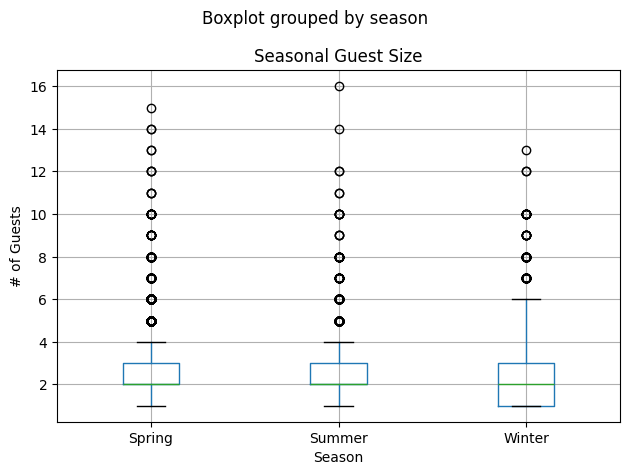

Season is Autumn, Summary Stats
--------------------------------
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: m_guests, dtype: float64

Season is Spring, Summary Stats
--------------------------------
count    5548.000000
mean        2.500901
std         1.530944
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: m_guests, dtype: float64

Season is Summer, Summary Stats
----------------------------------
count    2224.000000
mean        2.527428
std         1.570122
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: m_guests, dtype: float64

Season is Winter, Summary Stats
--------------------------------
count    3965.000000
mean        2.488272
std         1.566287
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: m_guests, dtype: float64


In [24]:
# filter for booked rows
df_booked = df_airbnb.loc[df_airbnb.booked == True]
df_seasons = df_booked.loc[df_airbnb.season != 'Autumn']
df_seasons.boxplot(column='m_guests', by='season', grid=True, 
                          xlabel='Season', ylabel='# of Guests')
plt.title('Seasonal Guest Size')
plt.tight_layout()
plt.show()

print('Season is Autumn, Summary Stats')
print('--------------------------------')
print(df_seasons.loc[df_seasons.season=='Autumn', 'm_guests'].describe())

print('\nSeason is Spring, Summary Stats')
print('--------------------------------')
print(df_seasons.loc[df_seasons.season=='Spring', 'm_guests'].describe())

print('\nSeason is Summer, Summary Stats')
print('----------------------------------')
print(df_seasons.loc[df_seasons.season=='Summer', 'm_guests'].describe())

print('\nSeason is Winter, Summary Stats')
print('--------------------------------')
print(df_seasons.loc[df_seasons.season=='Winter', 'm_guests'].describe())

- Spring and Winter have the most bookings; 5549 and 3966, respectively.
- Spring, Summer, and Winter have similar mean and std for 'm_guests'; 2.5 and 1.5, respectively.

In [25]:
from matplotlib import rc

rc('text', usetex=True)

In [26]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

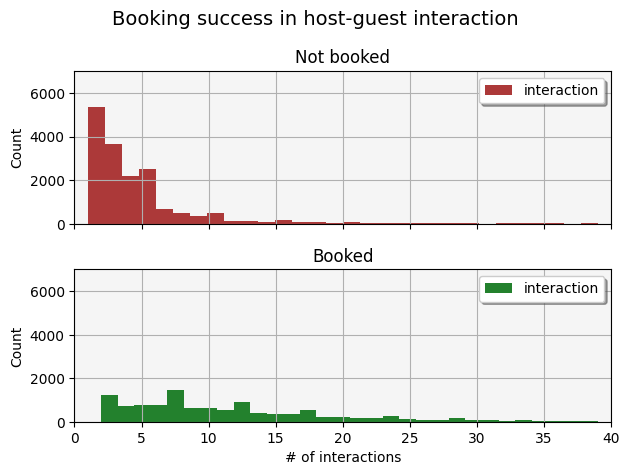

Booked is True, Summary Stats
------------------------------
count    11738.000000
mean        13.169194
std         12.618507
min          2.000000
25%          6.000000
50%         10.000000
75%         17.000000
max        410.000000
Name: m_interactions, dtype: float64

Booked is False, Summary Stats
-------------------------------
count    16730.000000
mean         4.759474
std          5.416372
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        153.000000
Name: m_interactions, dtype: float64


In [27]:
# filter data for subplots
data1 = df_airbnb.loc[(df_airbnb.m_interactions < 40) & (df_airbnb.booked == False)]
data2 = df_airbnb.loc[(df_airbnb.m_interactions < 40) & (df_airbnb.booked == True)]

# create subplots and axes objects
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

# plot histograms on each subplot with different colors
data1['m_interactions'].plot.hist(ax=axes[0], bins=30, color='#ac3939', grid=True)
data2['m_interactions'].plot.hist(ax=axes[1], bins=30, color='#23812d', grid=True)

# clean up plot
axes[0].set_xlim(0, 40)
axes[0].set_ylim(0, 7000)

axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')

axes[1].set_xlabel('# of interactions')
axes[0].set_facecolor('whitesmoke')
axes[1].set_facecolor('whitesmoke')

axes[0].set_title('Not booked')
axes[1].set_title('Booked')

axes[0].legend(["interaction"], shadow=True)
axes[1].legend(["interaction"], shadow=True)

plt.suptitle('Booking success in host-guest interaction', fontsize=14)
plt.tight_layout()
plt.savefig('images/host-guest-interaction.png', dpi=450)
plt.show()

print('Booked is True, Summary Stats')
print('------------------------------')
print(df_airbnb.loc[df_airbnb.booked==True, 'm_interactions'].describe())
print('\nBooked is False, Summary Stats')
print('-------------------------------')
print(df_airbnb.loc[df_airbnb.booked==False, 'm_interactions'].describe())


There are more messages between host and guest for successful bookings than non-successful bookings.

In [79]:
params

(np.float64(0.5901097718295205),
 -50.42515215679978,
 np.float64(226.96015621073133))

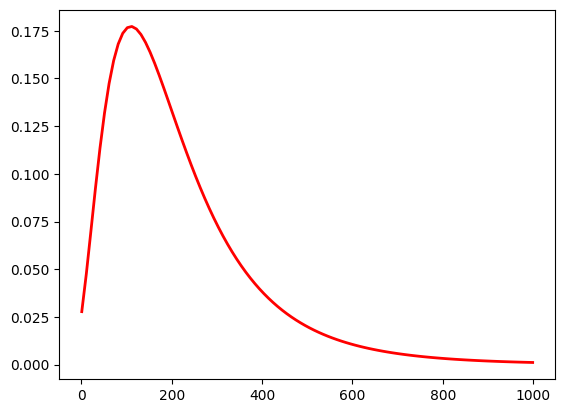

In [67]:
import scipy.stats as stats

# Fit a lognormal distribution
params = stats.lognorm.fit(fit_data)

# Get the fitted distribution
dist = stats.lognorm(*params)

plt.show()

In [89]:
ydata, bins = np.histogram(fit_data, bins=30)

In [138]:
type(xdata[0])
# bins

float

In [137]:
xdata = []
for i in range(len(bins) - 1):
    # get center of bins
    center = ((bins[i] + bins[i+1])/2.0).item()
    # add center to list
    xdata.append(center)

In [94]:
# fitfunc = lambda A, mu, sigma, x: (A/(x*sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*(np.log(x)-mu)/sigma/sigma)
# errfunc = lambda A, mu, sigma, x, y: (y - fitfunc(A, mu, sigma, x))

In [144]:
fitfunc = lambda a, x: (a[0]/(np.array(x)*a[1]*np.sqrt(2*np.pi)))*np.exp(-0.5*(np.log(np.array(x))-a[2]) / (a[1]**2))
errfunc = lambda a, x, y: (y - fitfunc(a, x))


In [145]:
from scipy.optimize import leastsq

init = [530000.0, 160.0, 210.0]
out = leastsq(errfunc, init, args=(xdata, ydata))
coeff = out[0]

In [146]:
coeff

array([8.71714084e+07, 1.06600403e+03, 2.94330828e+05])

In [97]:
# get data for fit line
good_data = data1.loc[(data1.m_first_message_length_in_characters > 0)]
fit_data = good_data['m_first_message_length_in_characters']

# Fit a normal distribution to the data
mu, sigma = np.mean(fit_data), np.std(fit_data)

# Generate x-values for the fitted distribution
x = np.linspace(min(fit_data), max(fit_data), 100)

# Calculate the y-values for the fitted distribution
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [61]:
print(mu, sigma)

218.82127059426887 164.99252590609424


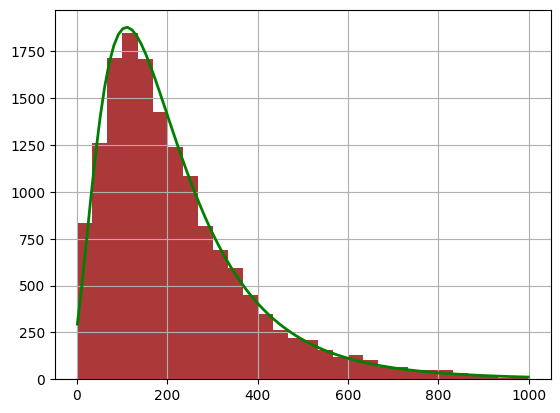

In [78]:
good_data['m_first_message_length_in_characters'].hist(bins=30, color='#ac3939', grid=True)
plt.plot(x, 530000*dist.pdf(x), 'g-', linewidth=2)
plt.show()

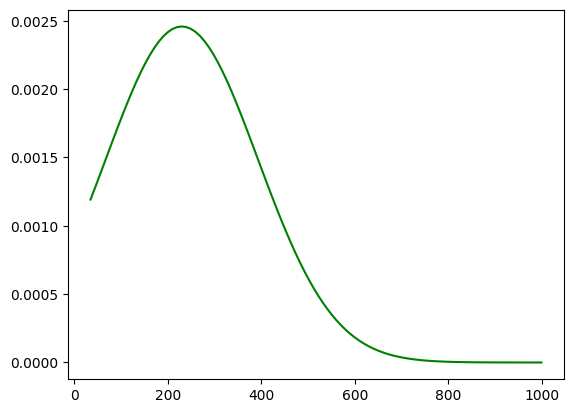

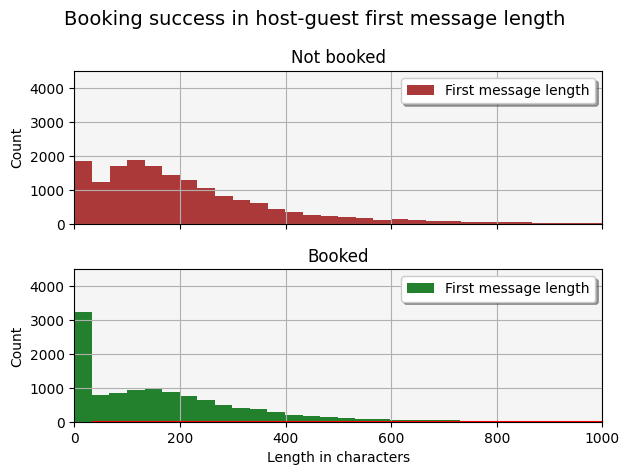

Booked is True, Summary Stats
------------------------------
count    11738.000000
mean       170.485858
std        179.654189
min          0.000000
25%         21.000000
50%        134.000000
75%        249.000000
max       2341.000000
Name: m_first_message_length_in_characters, dtype: float64

Booked is False, Summary Stats
-------------------------------
count    16730.000000
mean       210.393126
std        184.420157
min          0.000000
25%         88.000000
50%        166.000000
75%        281.000000
max       1948.000000
Name: m_first_message_length_in_characters, dtype: float64


In [36]:
# filter data for subplots
data1 = df_airbnb.loc[(df_airbnb.m_first_message_length_in_characters <= 1000) & (df_airbnb.booked == False)]
data2 = df_airbnb.loc[(df_airbnb.m_first_message_length_in_characters <= 1000) & (df_airbnb.booked == True)]

# FIT LINE-------------------------------------------------------------------
# get data for fit line
good_data = data1.loc[(data1.m_first_message_length_in_characters > 34)]
fit_data = good_data['m_first_message_length_in_characters']

# Fit a normal distribution to the data
mu, sigma = np.mean(fit_data), np.std(fit_data)

# Generate x-values for the fitted distribution
x = np.linspace(min(fit_data), max(fit_data), 100)

# Calculate the y-values for the fitted distribution
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
#----------------------------------------------------------------------------

# create subplots and axes objects
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

# plot histograms on each subplot with different colors
data1['m_first_message_length_in_characters'].plot.hist(ax=axes[0], bins=30, color='#ac3939', grid=True)
data2['m_first_message_length_in_characters'].plot.hist(ax=axes[1], bins=30, color='#23812d', grid=True)

# plot fit line 
plt.plot(x, y, color='red')

# clean up plot
axes[0].set_xlim(0, 1000)
axes[0].set_ylim(0, 4500)

axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')

axes[1].set_xlabel('Length in characters')
axes[0].set_facecolor('whitesmoke')
axes[1].set_facecolor('whitesmoke')

axes[0].set_title('Not booked')
axes[1].set_title('Booked')

axes[0].legend(["First message length"], shadow=True)
axes[1].legend(["First message length"], shadow=True)

plt.suptitle('Booking success in host-guest first message length', fontsize=14)
plt.tight_layout()
plt.savefig('images/host-guest-first-message-length.png', dpi=450)
plt.show()


print('Booked is True, Summary Stats')
print('------------------------------')
print(df_airbnb.loc[df_airbnb.booked==True, 'm_first_message_length_in_characters'].describe())
print('\nBooked is False, Summary Stats')
print('-------------------------------')
print(df_airbnb.loc[df_airbnb.booked==False, 'm_first_message_length_in_characters'].describe())

There are shorter first interaction messages for successful bookings, than unsuccessful bookings. 

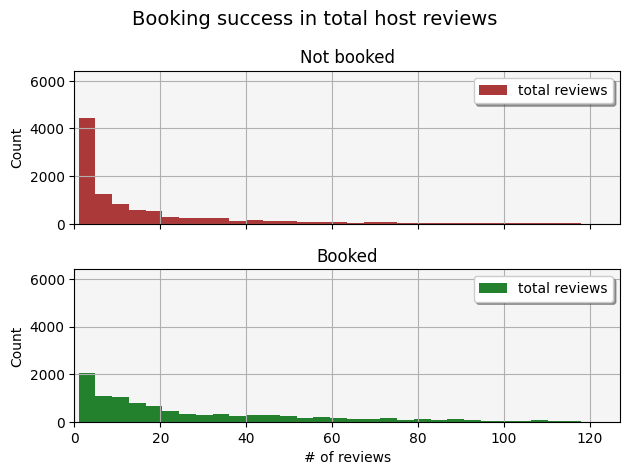

In [78]:
# filter data for subplots
data1 = df_airbnb.loc[(df_airbnb.total_reviews > 0) & (df_airbnb.total_reviews < 120) & (df_airbnb.booked == False)]
data2 = df_airbnb.loc[(df_airbnb.total_reviews > 0) & (df_airbnb.total_reviews < 120) & (df_airbnb.booked == True)]

# create subplots and axes objects
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

# plot histograms on each subplot with different colors
data1['total_reviews'].plot.hist(ax=axes[0], bins=30, color='#ac3939', grid=True)
data2['total_reviews'].plot.hist(ax=axes[1], bins=30, color='#23812d', grid=True)

# clean up plot
axes[0].set_xlim(0, 127)
axes[0].set_ylim(0, 6400)

axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')

axes[1].set_xlabel('# of reviews')
axes[0].set_facecolor('whitesmoke')
axes[1].set_facecolor('whitesmoke')

axes[0].set_title('Not booked')
axes[1].set_title('Booked')

axes[0].legend(["total reviews"], shadow=True)
axes[1].legend(["total reviews"], shadow=True)

plt.suptitle('Booking success in total host reviews', fontsize=14)
plt.tight_layout()
plt.savefig('images/host-total-reviews.png', dpi=450)
plt.show()

Listings with higher number of reviews tend to be booked more. Perhaps, the more reviews a listing has the more likely someone is to book with it.

In [79]:
df_airbnb['booking_time_hrs'] = df_airbnb['booking_time'] / np.timedelta64(1, 'm') / 1440

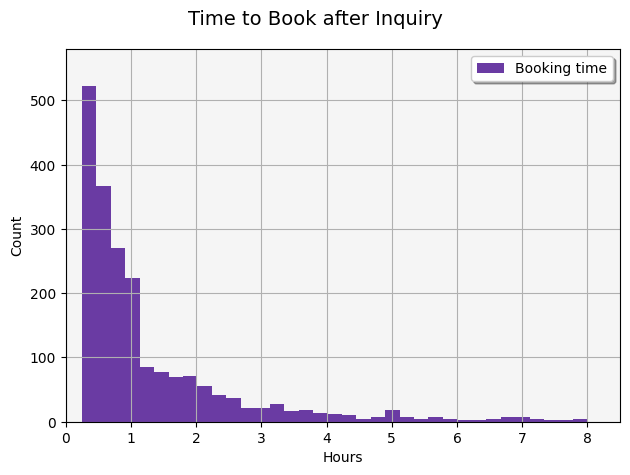

In [80]:
# filter for booking time between 15 minutes and 8 hrs. (to get a good visual on distrubtion)
df_booking_time = df_airbnb[(df_airbnb['booking_time_hrs'] < 8) 
                            & (df_airbnb['booking_time_hrs'] > 0.25) 
                            & (df_airbnb['contact_channel_first'] != 'instant_book')]

# plot histograms on each subplot with different colors
ax = df_booking_time['booking_time_hrs'].plot.hist(bins=35, color='#6a3ba3', grid=True)

# clean up plot
ax.set_xlim(0, 8.5)
ax.set_ylim(0, 580)

ax.set_ylabel('Count')

ax.set_xlabel('Hours')
ax.set_facecolor('whitesmoke')

ax.legend(['Booking time'], shadow=True)
# axes[1].legend(["total reviews"], shadow=True)

plt.suptitle('Time to Book after Inquiry', fontsize=14)
plt.tight_layout()
plt.savefig('images/time-to-book.png', dpi=450)
plt.show()


Most bookings tend to occur within the first 2 to 3 hrs of guest messaging the host. 

In [122]:
df_booked = df_airbnb.loc[df_airbnb.booked == True]
df_booked.listing_neighborhood.value_counts() \
                              .rename_axis('Listing Neighborhood') \
                              .reset_index(name='Count') \
                              .head(6)

,Listing Neighborhood,Count
0,-unknown-,4346
1,Copacabana,2928
2,Ipanema,1457
3,Leblon,478
4,Barra da Tijuca,367
5,Santa Teresa,361


The top 5 most popular neighboorhoods in Brazil are Copacabana, Ipanema, Leblon, Barra da Tijuca, and Santa Teresa.   


In [117]:
df_booked.guest_country.value_counts() \
                       .rename_axis('Guest Country') \
                       .reset_index(name='Count') \
                       .head(5)

,Guest Country,Count
0,BR,4281
1,US,2031
2,FR,791
3,AR,711
4,GB,692


The top 5 countries where guests come from are Brazil (locals), United States, France, Argentina, and United Kingdom.

In [118]:
df_booked.contact_channel_first.value_counts() \
                               .rename_axis('Contact Channel') \
                               .reset_index(name='Count') \
                               .head(5)

,Contact Channel,Count
0,instant_book,6755
1,book_it,4054
2,contact_me,929


Opt-ing in to 'instant book' looks to have better outlook on successful bookings.

In [119]:
df_booked.room_type.value_counts() \
                   .rename_axis('Room Type') \
                   .reset_index(name='Count') \
                   .head(5)

,Room Type,Count
0,Entire home/apt,8542
1,Private room,2999
2,Shared room,197


Entire home or apartment have a significantly better booking results than private rooms (3x more) and shared rooms. It appears it is more common for someone to book an entire residence than a single room.

In [120]:
df_booked.guest_user_stage_first.value_counts() \
                                .rename_axis('Guest User Stage') \
                                .reset_index(name='Count') \
                                .head(5)

,Guest User Stage,Count
0,past_booker,6372
1,new,5352
2,-unknown-,14


In [99]:
(6373-5353)/5353

0.1905473566224547

The are about 20% more bookings by past bookers than new bookers.

In [100]:
pd.set_option('display.max_columns', None)

In [ ]:
display(df_airbnb.loc[df_airbnb.booked == True].sort_values(by=['host_bookings', 'host_av'], ascending=False).head(3))


,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,guest_country,guest_words_in_user_profile,host_country,host_words_in_user_profile,booked,booking_time,season,spring_av,summer_av,autumn_av,winter_av,listing_bookings,host_av,num_listings,host_bookings,booking_time_hrs
115,225c2590-e0c1-48e7-af60-bab995605d2d,617ae029-6a46-4137-92dd-66e8d567e55f,12e7e554-bad1-44e1-8a13-135cdb8d03f6,2016-06-17 17:17:41,2016-06-17 20:57:59,2016-06-17 20:58:04,2016-06-17 20:58:04,2016-08-02,2016-08-04,4.0,23,267.0,book_it,past_booker,Entire home/apt,Leblon,9.0,BE,0,BR,1,True,0 days 03:40:23,Summer,1.0,1.0,NaN,0.0,5.0,0.786408,11.0,81.0,0.153044
591,ac5abec7-c0f7-48b2-82a6-e02588e7b051,617ae029-6a46-4137-92dd-66e8d567e55f,35c33ee6-85eb-4778-8d9f-3a62e109d947,2016-05-18 02:25:07,2016-05-18 02:30:54,2016-05-18 02:30:54,2016-05-18 02:30:54,2016-05-21,2016-05-26,3.0,13,86.0,instant_book,past_booker,Entire home/apt,Copacabana,15.0,AT,0,BR,1,True,0 days 00:05:47,Spring,1.0,1.0,NaN,0.0,9.0,0.786408,11.0,81.0,0.004016
1571,a3ac1839-e444-489d-a633-44ad95fef8c3,617ae029-6a46-4137-92dd-66e8d567e55f,6237b424-e01f-4462-bd3b-ceb7fb3a0d04,2016-01-12 18:14:14,2016-01-12 18:29:49,2016-01-12 18:29:49,2016-01-12 18:29:49,2016-08-05,2016-08-13,2.0,18,417.0,instant_book,past_booker,Entire home/apt,Copacabana,12.0,GB,0,BR,1,True,0 days 00:15:35,Winter,1.0,1.0,NaN,0.6,6.0,0.786408,11.0,81.0,0.010822


Possible metrics to monitor team's efforts to improve host-guest matching:
- Time to book (host and guest average booking time per season)
- Host's booking average (succesful bookings over all bookings) per season
- Host's new bookers over all bookers count per season (newcomer rate)
- Host's past bookers over all bookers count per season (return rate)
- Total reviews over total bookings changes over time
- Count of instant books, book it, or contact me over time

